# Generating CandleStick Chart using TimeSeries data from Eikon data API


## Overview

Basically, Eikon Data API provides the functionality to request a Time Series data for Eikon developer so a user can use the data for fundamental historical data analysis or technical analysis. They can also use the data to illustrate market movements. 

The Japanese candlestick chart and open-high-low-close chart (also OHLC) commonly used to illustrate movements in the price of a financial instrument over time. It's popular in finance and some strategies in technical analysis use them to make trading decisions, depending on the shape, color, and position of the candles. Although the Eikon user can use this kind of chart on Eikon Desktop, the API is a choice for a user who wants to use their own algorithm and calculation to generate a graph for technical analysis.

This example demonstrates how to request the Time Series data from Python Eikon Data API and plot a simple graphs for basic technical analysis. And it also provide sample codes to generate an OHLC CandleStick chart and then plotting a Moving average to the graph. The user can use their own algorithm to make a decision based on the result from the graph and OHLC CandleStick chart. Note that this example does not cover the part to analyze the graph.

## Packages Required

User must [install python Eikon Data API](https://developers.refinitiv.com/eikon-apis/eikon-data-api/quick-start) and it requires __pandas__, __matplotlib__ and __candlestick_ohlc__ from __mpl_finance__ to process and visualize the stock data returned from the Eikon data API. We also use a method __distplot__ from __seaborn__ package to plot a histogram to see a distribution of the price.

```python
import eikon as ek
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
```


## Retrieve a Time Series data using Eikon Data API

To use Eikon data API, the user has to start Eikon and they must install the Eikon Python library and then generate AppID at the first steps. Please find the following [quick start guide](https://developers.refinitiv.com/eikon-apis/eikon-data-api/quick-start) to install the Eikon Python library. A developer can find a document regarding the methods available for the Python API from [Eikon Data API for Python Dev guide](https://docs-developers.refinitiv.com/1565330791086/14684/book/en/index.html).

To request a TimeSeries data, a developer can use method [get_timeseries](https://docs-developers.refinitiv.com/1565330791086/14684/book/en/eikon/index.html#get_timeseries) to retrieve the data.
Typically, user can specify RIC name, a period of times/interval and a field list such as Open, High, Low and Close price when requesting the data.

In [10]:
import eikon as ek
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import dates
from mpl_finance import candlestick_ohlc
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
ek.set_app_key('<Your Eikon APP Key>')
itemName="MSFT.O"
dateStart="2014-01-01"
dateEnd=datetime.now()

# request time series data with adjusted close price
df_adjustOHLC=ek.get_timeseries(itemName,fields=["Open","High","Low","Close","Volume" ], start_date = dateStart , 
                                end_date = dateEnd , interval='daily', corax = 'adjusted' )

From the snippet codes provided above, we use method [get_timeseries](https://docs-developers.refinitiv.com/1565330791086/14684/book/en/eikon/index.html#get_timeseries) to get daily close price and we set Corax to 'adjusted' to get adjusted close price. 

To run this example you have to change <AppKey>, __itemName__, __datestart__ and __dateEnd__ to a period of time you want to retrieve. I set a dateStart since 2014 because I can shorten a period of time later from the dataframe. 
    
Below is sample data returned by the method. We call dataframe.head and dataframe.tail to print the data from the dataframe.

In [11]:
print('Row count=',len(df_adjustOHLC.index))
print(df_adjustOHLC.head(10))
print(df_adjustOHLC.tail(10))

Row count= 1422
MSFT.O        OPEN   HIGH    LOW  CLOSE      VOLUME
Date                                               
2014-01-02  37.350  37.40  37.10  37.16  30643745.0
2014-01-03  37.200  37.22  36.60  36.91  31134795.0
2014-01-06  36.850  36.89  36.11  36.13  43615035.0
2014-01-07  36.325  36.49  36.21  36.41  35924726.0
2014-01-08  36.000  36.14  35.58  35.76  59979542.0
2014-01-09  35.880  35.91  35.40  35.53  36520448.0
2014-01-10  35.900  36.15  35.75  36.04  40558766.0
2014-01-13  35.990  36.02  34.83  34.98  45923872.0
2014-01-14  34.730  35.88  34.63  35.78  41627325.0
2014-01-15  35.900  36.79  35.85  36.76  44909545.0
MSFT.O          OPEN      HIGH      LOW   CLOSE      VOLUME
Date                                                       
2019-08-13  136.0500  138.8000  135.000  138.60  25496593.0
2019-08-14  136.3600  136.9200  133.670  133.98  32527251.0
2019-08-15  134.3900  134.5800  132.250  133.68  28125416.0
2019-08-16  134.8800  136.4600  134.720  136.13  25026151.0


# Visualizing Stock Data

## Plot a simple Daily Closing Price line graph

We can create a simple line graph to compare open and close price using the following codes. You can change size of figure.figsize to adjust chart size.

<IPython.core.display.Javascript object>


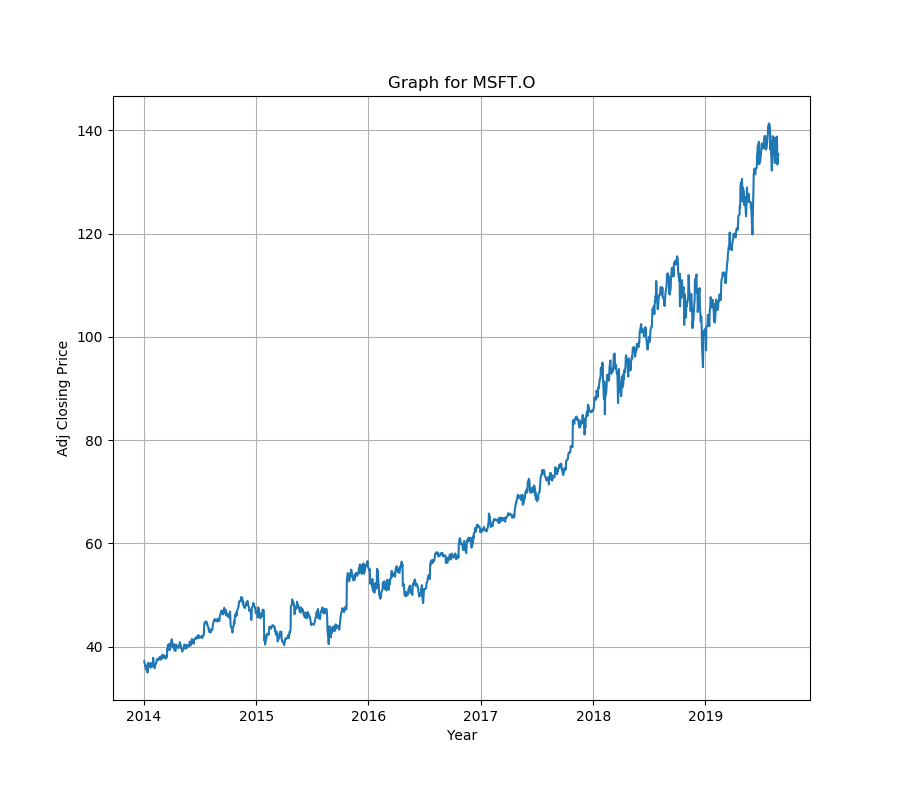

In [12]:
%matplotlib notebook

fig = plt.figure(figsize=(9,8),dpi=100)
ax = plt.subplot2grid((3,3), (0, 0), rowspan=3, colspan=3)
titlename='Graph for '+itemName
ax.set_title(titlename)
ax.set_xlabel('Year')
ax.set_ylabel('Adj Closing Price')
ax.grid(True)
ax.plot(df_adjustOHLC.index, df_adjustOHLC['CLOSE']) 
plt.show()

### Plot the Daily Closing Price and Stock Volume

It may useful to review a trading volume to spot for spikes in trading. We can add a bar chart under the line graph for a daily close price as a subplot to indicate the volume. I will shorten a period of time to display data from 2018 instead. You can change it to any period of time you are interesting.

<IPython.core.display.Javascript object>


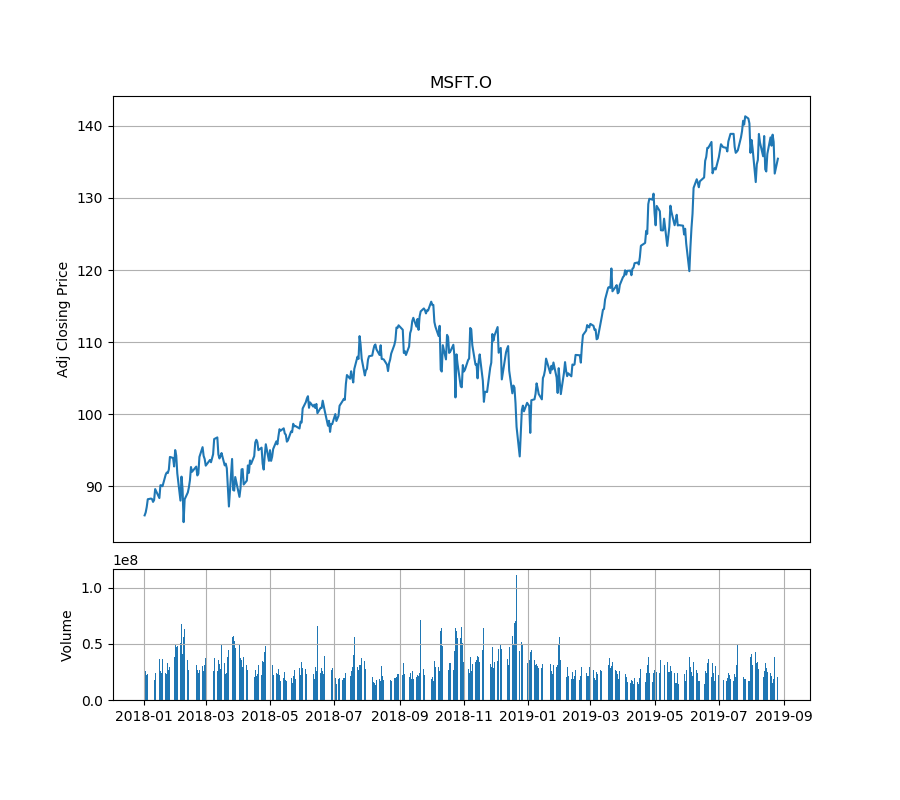

Text(0, 0.5, 'Volume')

In [13]:
df=df_adjustOHLC[['CLOSE','VOLUME']].loc['2018-01-01':datetime.now(),:]

fig = plt.figure(figsize=(9,8),dpi=100)
top = plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
top.grid(True)

#set sharex to top so we can zoom or pan both graph
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4,sharex=top)
bottom.grid(True)

#top graph for daily close price and bottom one is bar graph for stock volumen.
top.plot(df.index, df['CLOSE']) 
bottom.bar(df.index, df['VOLUME']) 
 
# set the labels
top.axes.get_xaxis().set_visible(False)
top.set_title(itemName)
top.set_ylabel('Adj Closing Price')
bottom.set_ylabel('Volume')

### Generate a Histogram of the Daily Closing Price

A histogram might be useful to help review daily closing prices over time to see the spread or volatility, and also the type of distribution. We use the seaborn distplot method to plot the graph.

<IPython.core.display.Javascript object>


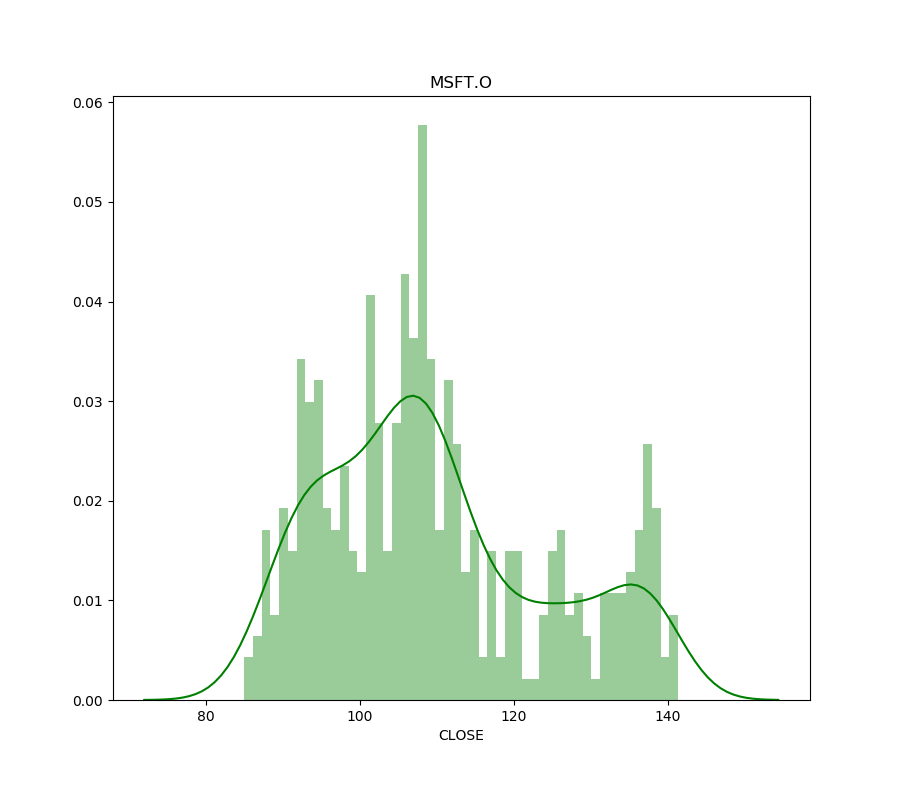

In [14]:
import seaborn as sns
plt.figure(figsize=(9,8),dpi=100)
df=df_adjustOHLC[['CLOSE','VOLUME']].loc['2018-01-01':datetime.now(),:]
graph=sns.distplot(df['CLOSE'].dropna(), bins=50, color='green')
graph.set_title(itemName)
plt.show()

## Plot the CandleStick OHLC Chart

Next step we will generate a CandleStick using method candlestick_ohlc from mpl_finance library. Please note that from details in this [link](https://matplotlib.org/api/finance_api.html), module matplotlib.finance is deprecated in 2.0 and has been moved to a module called mpl_finance. It's still working when we have matplotlib version 2.1.2 but this may stop working in any future releases, however, you still be able to use mpl_finance module to use this feature. Note that mpl_finance is no longer maintained.  

To generate the graph we need to pass a dataframe column which contain Open, High, Low and Close price to the method. And there are some additional steps to configuring a tick locating and formatting before plotting the graph. Hence we will add these steps to a new function instead so it can do formatting and generating a graph and then we can re-use this function to plot a moving average later.


In [15]:
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, otherseries = None,item_name=None):
    
    mondays = WeekdayLocator(MONDAY)    
    alldays = DayLocator()        
    dayFormatter = DateFormatter('%d') 
    
    plotdat = dat.loc[:,["OPEN", "HIGH", "LOW", "CLOSE"]]
    stick=1

    fig = plt.figure(figsize=(10,8),dpi=100)
    top=plt.subplot2grid((4,4), (0, 0), rowspan=3, colspan=4)
    top.set_ylabel('Adj Closing Price')
    bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4,sharex=top)
    
    fig.subplots_adjust(bottom=0.2)
    
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('366 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        top.xaxis.set_major_locator(mondays)
        top.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
        
    top.xaxis.set_major_formatter(weekFormatter)
    top.set_title(item_name)
    bottom.grid(True)
    
    # Create the candelstick chart
    candlestick_ohlc(top, list(zip(list(dates.date2num(plotdat.index.tolist())), plotdat["OPEN"].tolist(), plotdat["HIGH"].tolist(),
                      plotdat["LOW"].tolist(), plotdat["CLOSE"].tolist())),
                      colorup = "green", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = top, lw = 1.3, grid = True)
 
    top.xaxis_date()
    top.autoscale_view()
    top.grid(True)
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
    top.axes.get_xaxis().set_visible(False)
   
    bottom.bar(dat.index, dat['VOLUME'])
    bottom.set_ylabel('Volume')
    plt.show()

We need to call pandas_candlestick_ohlc and pass a dataframe return from ek.get_timeseries to generate a CandleStick chart.
As we add __%mathplotlib notebook__ to the codes, it will show toolbar under the chart so you can zoom and pan the CandleStick chart. And you can also change start and end date in df_adjustOHLC.loc[] to see a graph in difference peroid of times.

<IPython.core.display.Javascript object>


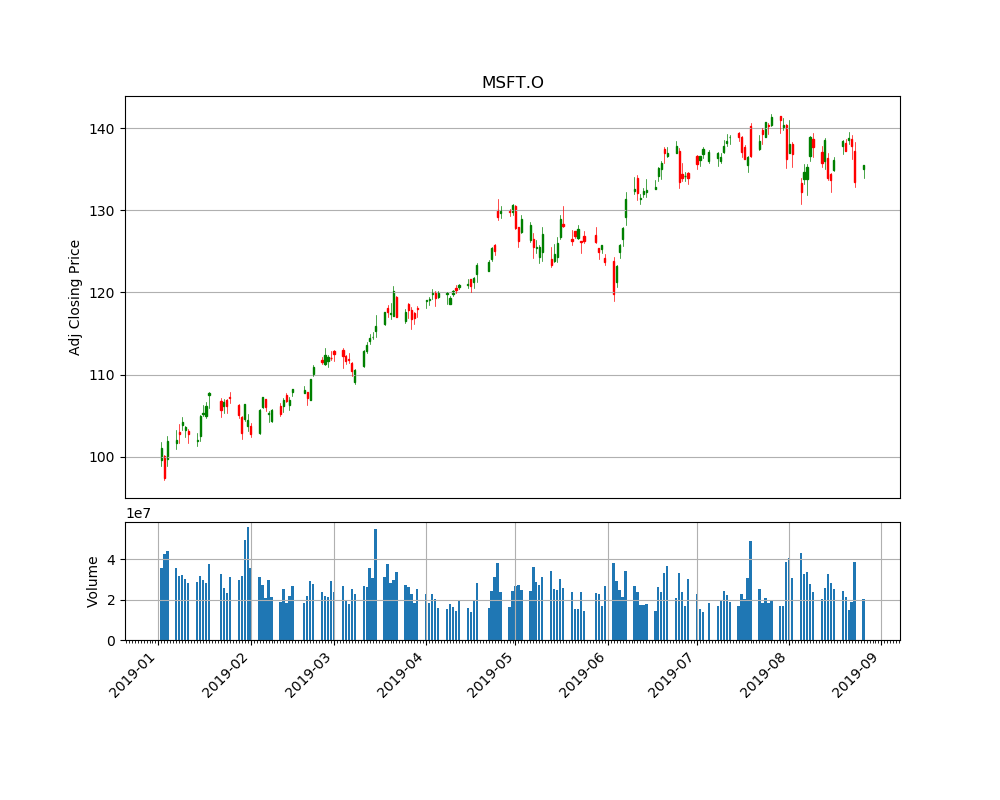

In [16]:
%matplotlib notebook
#pandas_candlestick_ohlc(df_adjustOHLC)
df=df_adjustOHLC.loc['2019-01-01':datetime.now(),:]
pandas_candlestick_ohlc(df,item_name=itemName)

From a candlestick chart(zoom the graph), a green candlestick indicates a day where the closing price was higher than the open(Gain), while a red candlestick indicates a day where the open was higher than the close (Loss). The wicks indicate the high and the low, and the body the open and close (hue is used to determine which end of the body is open and which the close). You can change the color in pandas_candlestick_ohlc function we have created. And as I said previously, a user can use Candlestick charts for technical analysis and use them to make trading decisions, depending on the shape, color, and position of the candles. We will not cover a technical analysis in this example..

## Add Simple Moving Average to the graph

Lastly, we will add a moving average (MA) to the CandleStick chart. MA is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random short-term price fluctuations. It is a trend-following or lagging, indicator because it is based on past prices. The two basic and commonly used moving averages are the simple moving average (SMA), which is the simple average of a security over a defined number of time periods, and the exponential moving average (EMA), which gives greater weight to more recent prices. Note that this example will use only SMA. The most common applications of moving averages are to identify the trend direction and to determine support and resistance levels. After we get the CandleStick chart, it's time to calculate Moving averages and plot to the CandleSticks graph.

Basically, pandas provides functionality for easily computing a simple moving averages. The following codes creating a 20-day moving average from adjusted close price from the data frame, and plotting it alongside the stock.


<IPython.core.display.Javascript object>


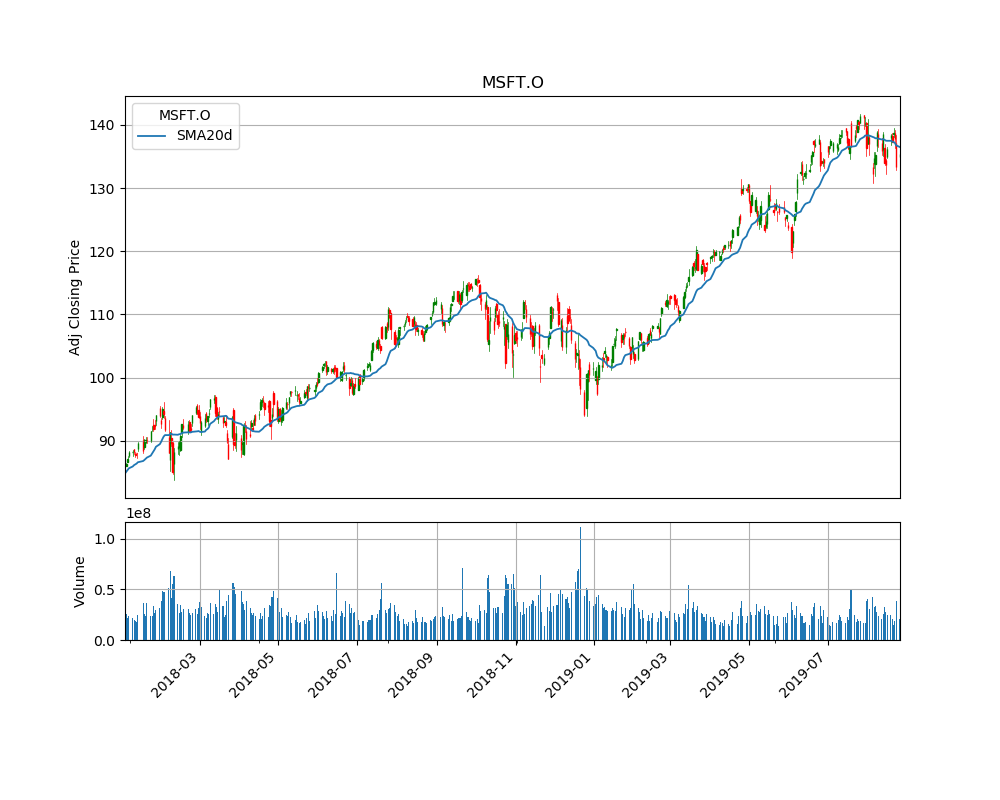

In [17]:

df_adjustOHLC["SMA20d"] = np.round(df_adjustOHLC["CLOSE"].rolling(window = 20, center = False).mean(), 2)
df=df_adjustOHLC.loc['2018-01-01':datetime.now(),:]
pandas_candlestick_ohlc(df, otherseries = "SMA20d",item_name=itemName)

Moving averages lag behind current price action because they are based on past prices; the longer the time period for the moving average, the greater the lag. Thus, a 200-day MA will have a much greater degree of lag than a 20-day MA because it contains prices for the past 200 days.

The length of the moving average to use depends on the trading objectives, with shorter moving averages used for short-term trading and longer-term moving averages more suited for long-term investors. The 50-day and 200-day MAs are widely followed by investors and traders, with breaks above and below this moving average considered to be important trading signals.

The following codes use to generated CandleStick chart with multiple periods of times for SMA(20-day,50-day,75-day, and 200-day).

<IPython.core.display.Javascript object>


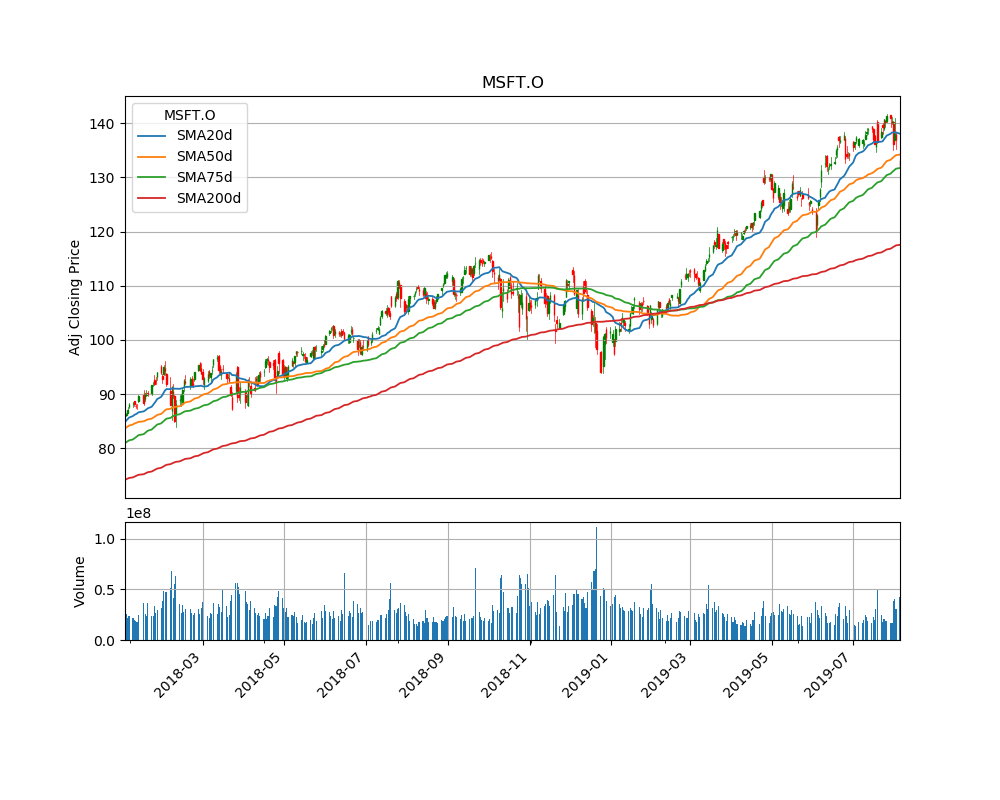

In [18]:
df_adjustOHLC["SMA50d"] = np.round(df_adjustOHLC["CLOSE"].rolling(window=50, center = False).mean(), 2)
df_adjustOHLC["SMA75d"] = np.round(df_adjustOHLC["CLOSE"].rolling(window=75, center = False).mean(), 2)
df_adjustOHLC["SMA200d"] = np.round(df_adjustOHLC["CLOSE"].rolling(window=200, center = False).mean(), 2)
df=df_adjustOHLC.loc['2018-01-01':'2019-08-05',:]
pandas_candlestick_ohlc(df, otherseries = ["SMA20d","SMA50d","SMA75d","SMA200d"],item_name=itemName)



There are other types of Moving Average that user can apply with the dataframe to calculate the average value. Many of python open-source package provide the method to calculate MA and [Ta-Lib](https://mrjbq7.github.io/ta-lib/) is one of the libraries which support the calculation and you may try it with the data from the Eikon Data API. However, we do not cover in this example.

## Summary

This example provides sample codes to call Eikon Data API for retrieving a Time Series data or daily close price and plot the data on various kind of graph.  It also demonstrates how to plot a Candle Stick chart with a moving average for finance technical analysis. User may add their own algorithm or calculation to support their requirement and may use an external library to calculate the moving average and plot to the chart. The graphs should be useful in terms of fundamental stock price technical analysis. The user can use the graphs/chart to identify trading opportunities in price trends and patterns seen on charts. 

## References

* [Eikon Data API Quick Start Guide](https://developers.refinitiv.com/eikon-apis/eikon-data-api/quick-start)
* [Eikon Data API for Python Developer guide](https://docs-developers.refinitiv.com/1565330791086/14684/book/en/index.html)
* [What Is a Moving Average Article.](https://www.investopedia.com/terms/m/movingaverage.asp)
* [Seborn Tutorial](https://seaborn.pydata.org/tutorial/distributions.html)

